In [10]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [11]:
# Enter credentials
username = "postgres"
password = "Flocke007"
database = "Database Project"
host = "localhost"
port = 5432


In [67]:
connection = psycopg2.connect(user = username,
                              password = password,
                              host = host,
                              port = port,
                              database = database)

cur = connection.cursor()

get_tags_query_main = """WITH RecipeIDs AS (
    SELECT DISTINCT r.recipe_id
    FROM recipe r
    JOIN review u ON r.recipe_id = u.recipe_id
    JOIN hasTag t ON r.recipe_id = t.recipe_id AND t.tag_name = 'low-cholesterol'
    JOIN hasTag t2 ON r.recipe_id = t2.recipe_id AND t2.tag_name = 'main-dish'
    WHERE u.rating >= 4.5
      AND r.number_ingredients <= 5
      AND r.sugar <= 100
      AND r.total_fat <= 100
      AND r.sodium <= 100
      AND r.protein <= 100
      AND r.saturated_fat <= 100
      AND r.carbohydrates <= 100
      AND r.cooking_time <= 15
)

SELECT t.tag_name
FROM hasTag t
JOIN recipe r ON t.recipe_id = r.recipe_id
WHERE r.recipe_id IN (SELECT recipe_id FROM RecipeIDs);"""

get_ingredients_query_main = """WITH RecipeIDs AS (
    SELECT DISTINCT r.recipe_id
    FROM recipe r
    JOIN review u ON r.recipe_id = u.recipe_id
    JOIN hasTag t ON r.recipe_id = t.recipe_id AND t.tag_name = 'low-cholesterol'
    JOIN hasTag t2 ON r.recipe_id = t2.recipe_id AND t2.tag_name = 'main-dish'
    WHERE u.rating >= 4.5
      AND r.number_ingredients <= 5
      AND r.sugar <= 100
      AND r.total_fat <= 100
      AND r.sodium <= 100
      AND r.protein <= 100
      AND r.saturated_fat <= 100
      AND r.carbohydrates <= 100
      AND r.cooking_time <= 15
)

SELECT i.ingredient_name
FROM hasingredient i
JOIN recipe r ON i.recipe_id = r.recipe_id
WHERE r.recipe_id IN (SELECT recipe_id FROM RecipeIDs);"""

get_tags_query_appetizers = """WITH RecipeIDs AS (
    SELECT DISTINCT r.recipe_id
    FROM recipe r
    JOIN review u ON r.recipe_id = u.recipe_id
    JOIN hasTag t ON r.recipe_id = t.recipe_id AND t.tag_name = 'low-cholesterol'
    JOIN hasTag t2 ON r.recipe_id = t2.recipe_id AND t2.tag_name = 'appetizers'
    WHERE u.rating >= 4.5
      AND r.number_ingredients <= 5
      AND r.sugar <= 100
      AND r.total_fat <= 100
      AND r.sodium <= 100
      AND r.protein <= 100
      AND r.saturated_fat <= 100
      AND r.carbohydrates <= 100
      AND r.cooking_time <= 15
)

SELECT t.tag_name
FROM hasTag t
JOIN recipe r ON t.recipe_id = r.recipe_id
WHERE r.recipe_id IN (SELECT recipe_id FROM RecipeIDs);"""

get_ingredients_query_appetizers = """WITH RecipeIDs AS (
    SELECT DISTINCT r.recipe_id
    FROM recipe r
    JOIN review u ON r.recipe_id = u.recipe_id
    JOIN hasTag t ON r.recipe_id = t.recipe_id AND t.tag_name = 'low-cholesterol'
    JOIN hasTag t2 ON r.recipe_id = t2.recipe_id AND t2.tag_name = 'appetizers'
    WHERE u.rating >= 4.5
      AND r.number_ingredients <= 5
      AND r.sugar <= 100
      AND r.total_fat <= 100
      AND r.sodium <= 100
      AND r.protein <= 100
      AND r.saturated_fat <= 100
      AND r.carbohydrates <= 100
      AND r.cooking_time <= 15
)

SELECT i.ingredient_name
FROM hasingredient i
JOIN recipe r ON i.recipe_id = r.recipe_id
WHERE r.recipe_id IN (SELECT recipe_id FROM RecipeIDs);"""

get_tags_query_desserts = """WITH RecipeIDs AS (
    SELECT DISTINCT r.recipe_id
    FROM recipe r
    JOIN review u ON r.recipe_id = u.recipe_id
    JOIN hasTag t ON r.recipe_id = t.recipe_id AND t.tag_name = 'low-cholesterol'
    JOIN hasTag t2 ON r.recipe_id = t2.recipe_id AND t2.tag_name = 'desserts'
    WHERE u.rating >= 4.5
      AND r.number_ingredients <= 5
      AND r.sugar <= 100
      AND r.total_fat <= 100
      AND r.sodium <= 100
      AND r.protein <= 100
      AND r.saturated_fat <= 100
      AND r.carbohydrates <= 100
      AND r.cooking_time <= 15
)

SELECT t.tag_name
FROM hasTag t
JOIN recipe r ON t.recipe_id = r.recipe_id
WHERE r.recipe_id IN (SELECT recipe_id FROM RecipeIDs);"""

get_ingredients_query_desserts = """WITH RecipeIDs AS (
    SELECT DISTINCT r.recipe_id
    FROM recipe r
    JOIN review u ON r.recipe_id = u.recipe_id
    JOIN hasTag t ON r.recipe_id = t.recipe_id AND t.tag_name = 'low-cholesterol'
    JOIN hasTag t2 ON r.recipe_id = t2.recipe_id AND t2.tag_name = 'desserts'
    WHERE u.rating >= 4.5
      AND r.number_ingredients <= 5
      AND r.sugar <= 100
      AND r.total_fat <= 100
      AND r.sodium <= 100
      AND r.protein <= 100
      AND r.saturated_fat <= 100
      AND r.carbohydrates <= 100
      AND r.cooking_time <= 15
)

SELECT i.ingredient_name
FROM hasingredient i
JOIN recipe r ON i.recipe_id = r.recipe_id
WHERE r.recipe_id IN (SELECT recipe_id FROM RecipeIDs);"""

get_filtered_main_recipe_number = """
SELECT Count(DISTINCT r.recipe_id) AS RowNumber
FROM recipe r
JOIN review u ON r.recipe_id = u.recipe_id
JOIN hastag t ON r.recipe_id = t.recipe_id AND t.tag_name = 'low-cholesterol'
JOIN hastag t2 ON r.recipe_id = t2.recipe_id AND t2.tag_name = 'main-dish'
WHERE u.rating >= 4.5
AND r.number_ingredients <= 5
AND r.sugar <= 100
AND r.total_fat <= 100
AND r.sodium <= 100
AND r.protein <= 100
AND r.saturated_fat <= 100
AND r.carbohydrates <= 100
AND r.cooking_time <= 15;"""

get_filtered_appetizers_recipe_number = """
SELECT Count(DISTINCT r.recipe_id) AS RowNumber
FROM recipe r
JOIN review u ON r.recipe_id = u.recipe_id
JOIN hastag t ON r.recipe_id = t.recipe_id AND t.tag_name = 'low-cholesterol'
JOIN hastag t2 ON r.recipe_id = t2.recipe_id AND t2.tag_name = 'appetizers'
WHERE u.rating >= 4.5
AND r.number_ingredients <= 5
AND r.sugar <= 100
AND r.total_fat <= 100
AND r.sodium <= 100
AND r.protein <= 100
AND r.saturated_fat <= 100
AND r.carbohydrates <= 100
AND r.cooking_time <= 15;"""

get_filtered_desserts_recipe_number = """SELECT Count(DISTINCT r.recipe_id) AS RowNumber
FROM recipe r
JOIN review u ON r.recipe_id = u.recipe_id
JOIN hastag t ON r.recipe_id = t.recipe_id AND t.tag_name = 'low-cholesterol'
JOIN hastag t2 ON r.recipe_id = t2.recipe_id AND t2.tag_name = 'desserts'
WHERE u.rating >= 4.5
AND r.number_ingredients <= 5
AND r.sugar <= 100
AND r.total_fat <= 100
AND r.sodium <= 100
AND r.protein <= 100
AND r.saturated_fat <= 100
AND r.carbohydrates <= 100
AND r.cooking_time <= 15;"""

get_total_main_recipe_number = """ 
SELECT Count(DISTINCT r.recipe_id) AS RowNumber
FROM recipe r
JOIN review u ON r.recipe_id = u.recipe_id
JOIN hastag t ON r.recipe_id = t.recipe_id AND t.tag_name = 'low-cholesterol'
JOIN hastag t2 ON r.recipe_id = t2.recipe_id AND t2.tag_name = 'main-dish'
"""

get_total_appetizers_recipe_number = """ 
SELECT Count(DISTINCT r.recipe_id) AS RowNumber
FROM recipe r
JOIN review u ON r.recipe_id = u.recipe_id
JOIN hastag t ON r.recipe_id = t.recipe_id AND t.tag_name = 'low-cholesterol'
JOIN hastag t2 ON r.recipe_id = t2.recipe_id AND t2.tag_name = 'appetizers'
"""

get_total_desserts_recipe_number = """ 
SELECT Count(DISTINCT r.recipe_id) AS RowNumber
FROM recipe r
JOIN review u ON r.recipe_id = u.recipe_id
JOIN hastag t ON r.recipe_id = t.recipe_id AND t.tag_name = 'low-cholesterol'
JOIN hastag t2 ON r.recipe_id = t2.recipe_id AND t2.tag_name = 'desserts'
"""

cur.execute(get_tags_query_main)

# put the results into a pandas dataframe
has_tags_main_df = pd.DataFrame(cur.fetchall())

cur.execute(get_ingredients_query_main)

has_ingredients_main_df = pd.DataFrame(cur.fetchall())

cur.execute(get_tags_query_appetizers)

has_tags_appetizers_df = pd.DataFrame(cur.fetchall())

cur.execute(get_ingredients_query_appetizers)

has_ingredients_appetizers_df = pd.DataFrame(cur.fetchall())

cur.execute(get_tags_query_desserts)

has_tags_desserts_df = pd.DataFrame(cur.fetchall())

cur.execute(get_ingredients_query_desserts)

has_ingredients_desserts_df = pd.DataFrame(cur.fetchall())

cur.execute(get_filtered_main_recipe_number)

filtered_main_recipe_number = cur.fetchall()[0][0]

cur.execute(get_filtered_appetizers_recipe_number)

filtered_appetizers_recipe_number = cur.fetchall()[0][0]

cur.execute(get_filtered_desserts_recipe_number)

filtered_desserts_recipe_number = cur.fetchall()[0][0]

cur.execute(get_total_main_recipe_number)

total_main_recipe_number = cur.fetchall()[0][0]

cur.execute(get_total_appetizers_recipe_number)

total_appetizers_recipe_number = cur.fetchall()[0][0]

cur.execute(get_total_desserts_recipe_number)

total_desserts_recipe_number = cur.fetchall()[0][0]

connection.commit()

cur.close()
connection.close()

Number of recipes for main-dishes: 77
Number of recipes for appetizers: 181
Number of recipes for desserts: 314

Number of total recipes for main-dishes: 7023
Number of total recipes for appetizers: 2553
Number of total recipes for desserts: 3581


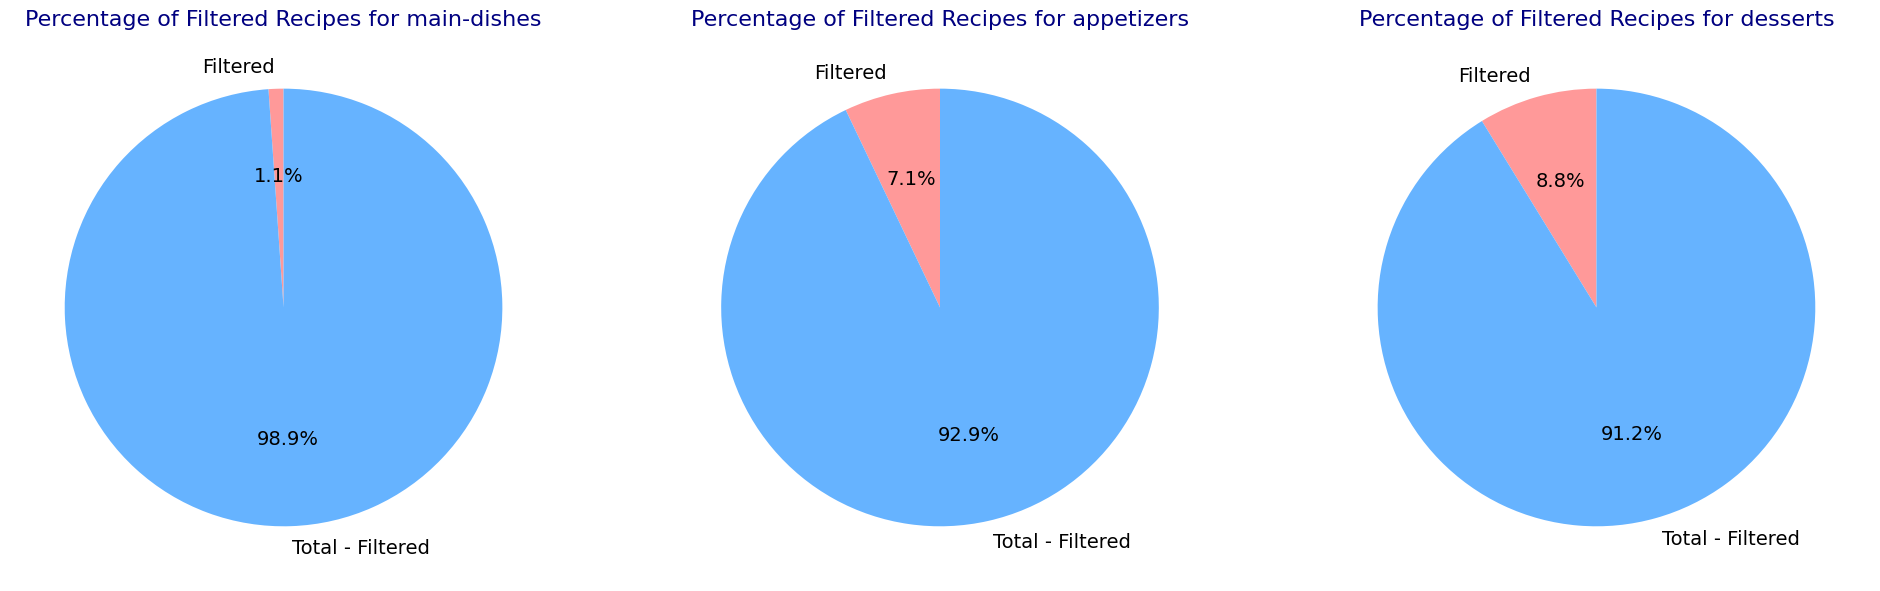

In [76]:
def plot_pie_chart(ax, filtered, total, title):
    data = [filtered, total - filtered]
    labels = ['Filtered', f'Total - Filtered']
    
    ax.pie(data, labels=labels, autopct='%1.1f%%', colors=['#ff9999', '#66b3ff'], startangle=90, textprops={'fontsize': 14})
    
    ax.set_title(title, fontsize=16, color='navy')

# print numbers
print(f'Number of recipes for main-dishes: {filtered_main_recipe_number}')
print(f'Number of recipes for appetizers: {filtered_appetizers_recipe_number}')
print(f'Number of recipes for desserts: {filtered_desserts_recipe_number}\n')

print(f'Number of total recipes for main-dishes: {total_main_recipe_number}')
print(f'Number of total recipes for appetizers: {total_appetizers_recipe_number}')
print(f'Number of total recipes for desserts: {total_desserts_recipe_number}')

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(24, 8))

# Plot pie charts using the function
plot_pie_chart(axs[0], filtered_main_recipe_number, total_main_recipe_number, 'Percentage of Filtered Recipes for main-dishes')
plot_pie_chart(axs[1], filtered_appetizers_recipe_number, total_appetizers_recipe_number, 'Percentage of Filtered Recipes for appetizers')
plot_pie_chart(axs[2], filtered_desserts_recipe_number, total_desserts_recipe_number, 'Percentage of Filtered Recipes for desserts')

plt.show()

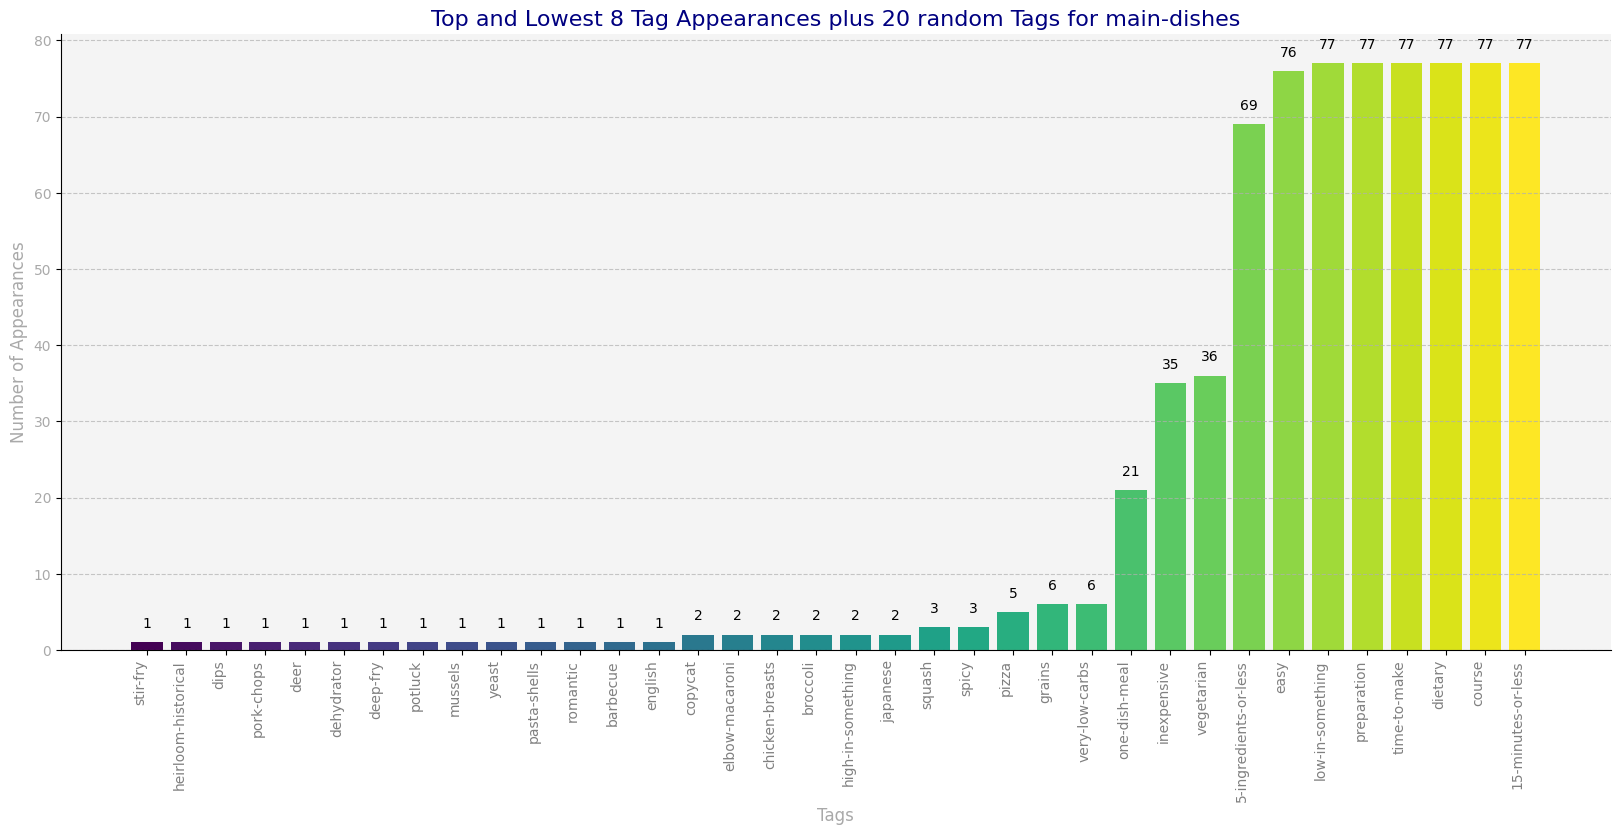

In [64]:
# Plot bar plot for the tags of the main dishes

# rename the column 0 to tag
has_tags_main_df.rename(columns={0: 'tag'}, inplace=True)
# Remove tags 'main-dish' and 'low-cholesterol'
filtered_tags = has_tags_main_df[has_tags_main_df['tag'].isin(['main-dish', 'low-cholesterol']) == False]

# Count the occurrences of each tag
tag_counts = filtered_tags['tag'].value_counts()

# Sort tags by the number of appearances
sorted_tags = tag_counts.sort_values(ascending=True)

N = 8  # Set the number of top and lowest tags to display

# Top N tags
top_tags = sorted_tags.head(N)

# random 20 tags from the middle
middle_tags = sorted_tags.sample(20)

# Lowest N tags
lowest_tags = sorted_tags.tail(N)

# Combine top and lowest tags
combined_tags = pd.concat([top_tags, middle_tags, lowest_tags])

combined_tags.sort_values(ascending=True, inplace=True)

plt.figure(figsize=(20, 8))  # Increase figure size

# Example color palette
colors = plt.cm.viridis(np.linspace(0, 1, len(combined_tags)))

# Get bar heights
bar_heights = combined_tags.values

plt.bar(combined_tags.index, bar_heights, color=colors, width=0.8)

# add numbers to the top of the bars
for index, value in enumerate(bar_heights):
    plt.text(index, value + 0.02 * max(bar_heights), str(value), ha='center', va='bottom', fontsize=10, color='black')

plt.xticks(rotation=90, ha='right', fontsize=10, color='grey')
plt.yticks(fontsize=10, color='darkgray')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().set_facecolor('#f4f4f4')  # Light gray background
plt.xlabel('Tags', fontsize=12, color='darkgray')
plt.ylabel('Number of Appearances', fontsize=12, color='darkgray')
plt.title(f'Top {N} Tag Appearances, Lowest {8} Tag Appearances and 20 Random in between for main-dishes', fontsize=16, color='navy')
plt.show()


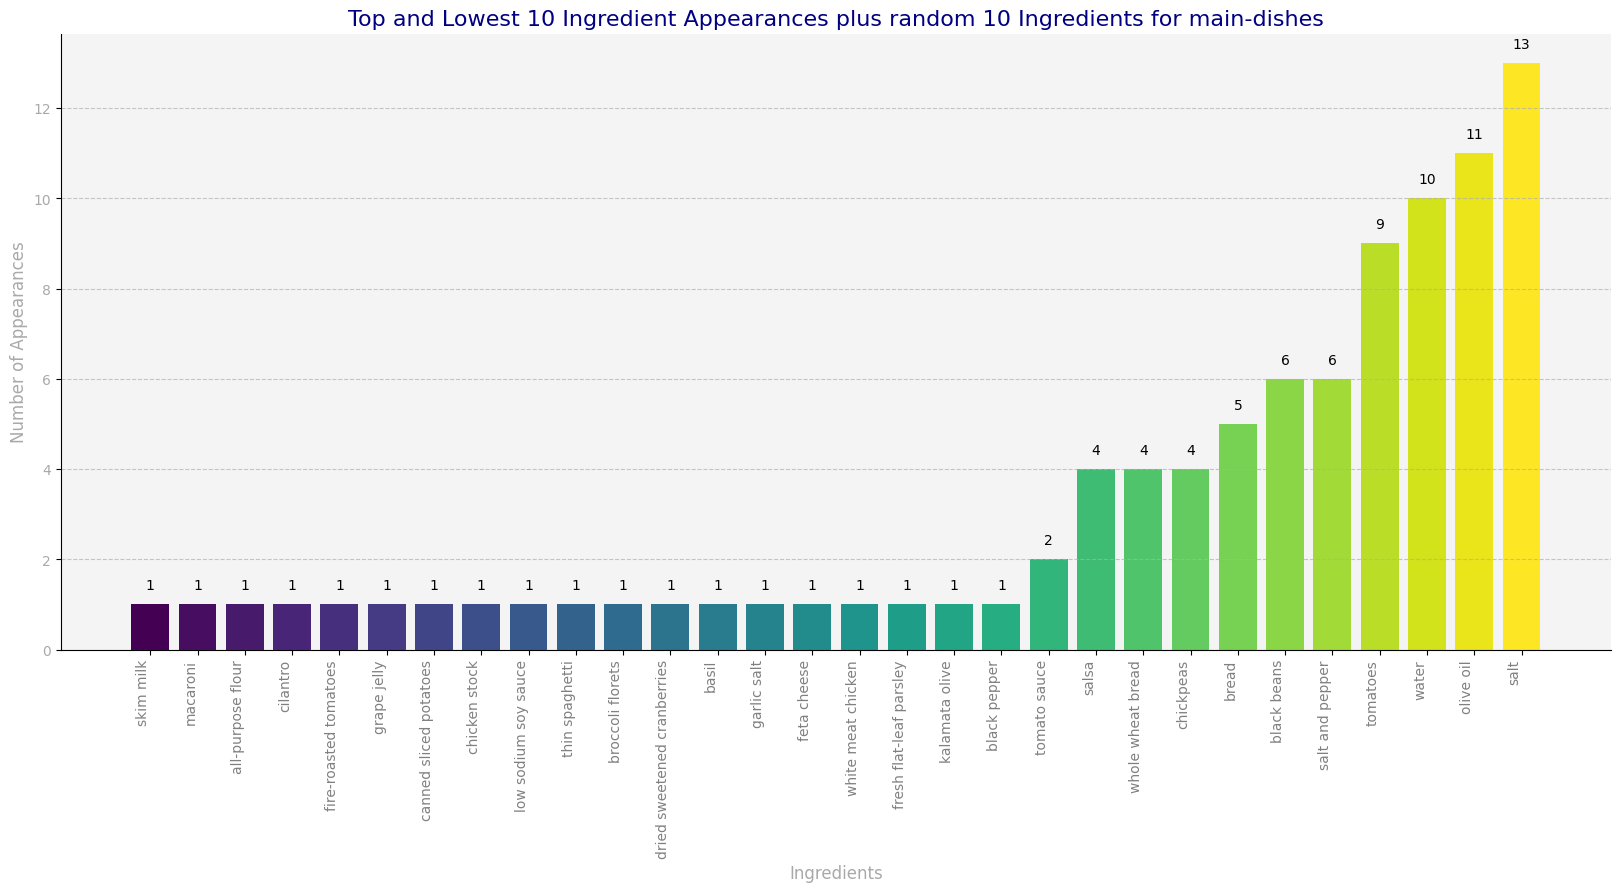

In [36]:
# Plot bar plot for the ingredients of the main-dishes

# rename the column 0 to ingredient
has_ingredients_main_df.rename(columns={0: 'ingredient'}, inplace=True)

# Count the occurrences of each ingredient
ingredient_counts = has_ingredients_main_df['ingredient'].value_counts()

# Sort ingredients by the number of appearances
sorted_ingredients = ingredient_counts.sort_values(ascending=True)

N = 10

# get the top 10 ingredients
top_ingredients = sorted_ingredients.head(N)

# get 10 random ingredients from the middle
middle_ingredients = sorted_ingredients.sample(N)

# get the lowest 10 ingredients
lowest_ingredients = sorted_ingredients.tail(N)

# combine the top, middle and lowest ingredients
combined_ingredients = pd.concat([top_ingredients, middle_ingredients, lowest_ingredients])

combined_ingredients.sort_values(ascending=True, inplace=True)

plt.figure(figsize=(20, 8))  # Increase figure size

# Example color palette
colors = plt.cm.viridis(np.linspace(0, 1, len(combined_ingredients)))

# Get bar heights
bar_heights = combined_ingredients.values

plt.bar(combined_ingredients.index, bar_heights, color=colors, width=0.8)

# add numbers to the top of the bars
for index, value in enumerate(bar_heights):
    plt.text(index, value + 0.02 * max(bar_heights), str(value), ha='center', va='bottom', fontsize=10, color='black')

plt.xticks(rotation=90, ha='right', fontsize=10, color='grey')
plt.yticks(fontsize=10, color='darkgray')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().set_facecolor('#f4f4f4')  # Light gray background
plt.xlabel('Ingredients', fontsize=12, color='darkgray')
plt.ylabel('Number of Appearances', fontsize=12, color='darkgray')
plt.title(f'Top {N} Ingredient Appearances, Lowest {N} Ingredient Appearances and {N} random Ingredients in between for main-dishes', fontsize=16, color='navy')
plt.show()


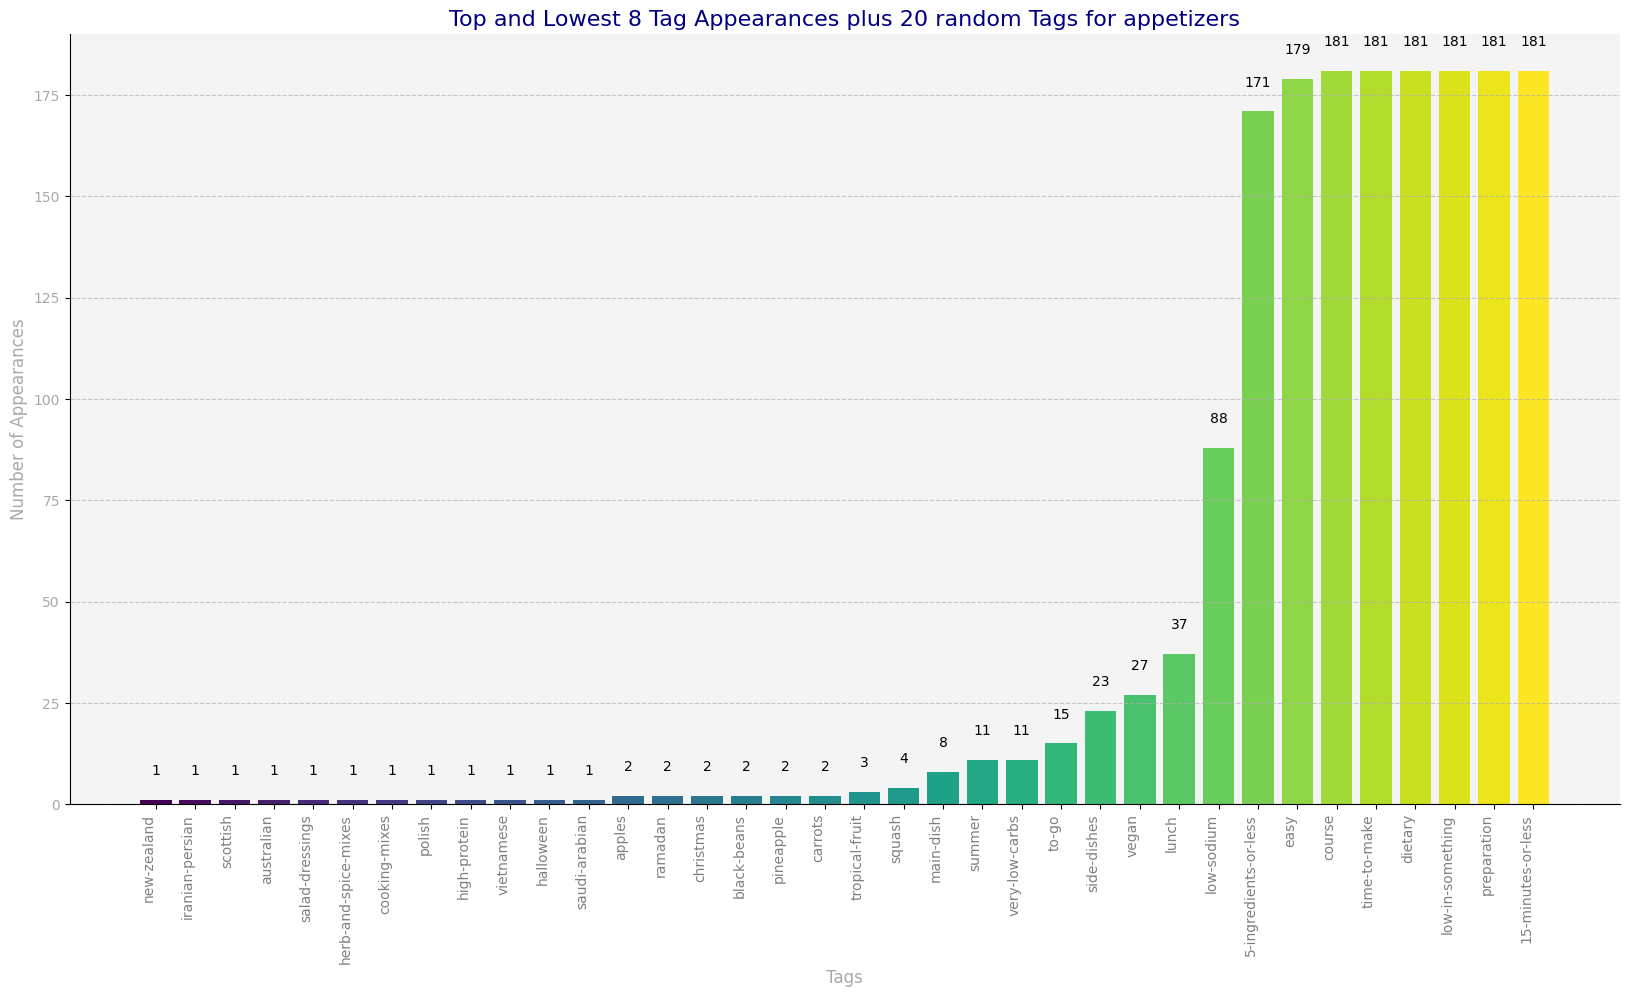

In [47]:
# Plot bar plot for the tags of the appetizers

# rename the column 0 to tag
has_tags_appetizers_df.rename(columns={0: 'tag'}, inplace=True)
# Remove tags 'appetizers' and 'low-cholesterol'
filtered_tags = has_tags_appetizers_df[has_tags_appetizers_df['tag'].isin(['appetizers', 'low-cholesterol']) == False]

# Count the occurrences of each tag
tag_counts = filtered_tags['tag'].value_counts()

# Sort tags by the number of appearances
sorted_tags = tag_counts.sort_values(ascending=True)

N = 8  # Set the number of top and lowest tags to display

# Top N tags
top_tags = sorted_tags.head(N)

# random 20 tags from the middle
middle_tags = sorted_tags.sample(20)

# Lowest N tags
lowest_tags = sorted_tags.tail(N)

# Combine top and lowest tags
combined_tags = pd.concat([top_tags, middle_tags, lowest_tags])

combined_tags.sort_values(ascending=True, inplace=True)

plt.figure(figsize=(20, 10))  # Increase figure size

# Example color palette
colors = plt.cm.viridis(np.linspace(0, 1, len(combined_tags)))

# Get bar heights
bar_heights = combined_tags.values

plt.bar(combined_tags.index, bar_heights, color=colors, width=0.8)

# add numbers to the top of the bars
for index, value in enumerate(bar_heights):
    plt.text(index, value + 0.03 * max(bar_heights), str(value), ha='center', va='bottom', fontsize=10, color='black')

plt.xticks(rotation=90, ha='right', fontsize=10, color='grey')
plt.yticks(fontsize=10, color='darkgray')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().set_facecolor('#f4f4f4')  # Light gray background
plt.xlabel('Tags', fontsize=12, color='darkgray')
plt.ylabel('Number of Appearances', fontsize=12, color='darkgray')
plt.title(f'Top {N} Tag Appearances, Lowest {8} Tag Appearances and 20 Random in between for appetizers', fontsize=16, color='navy')
plt.show()


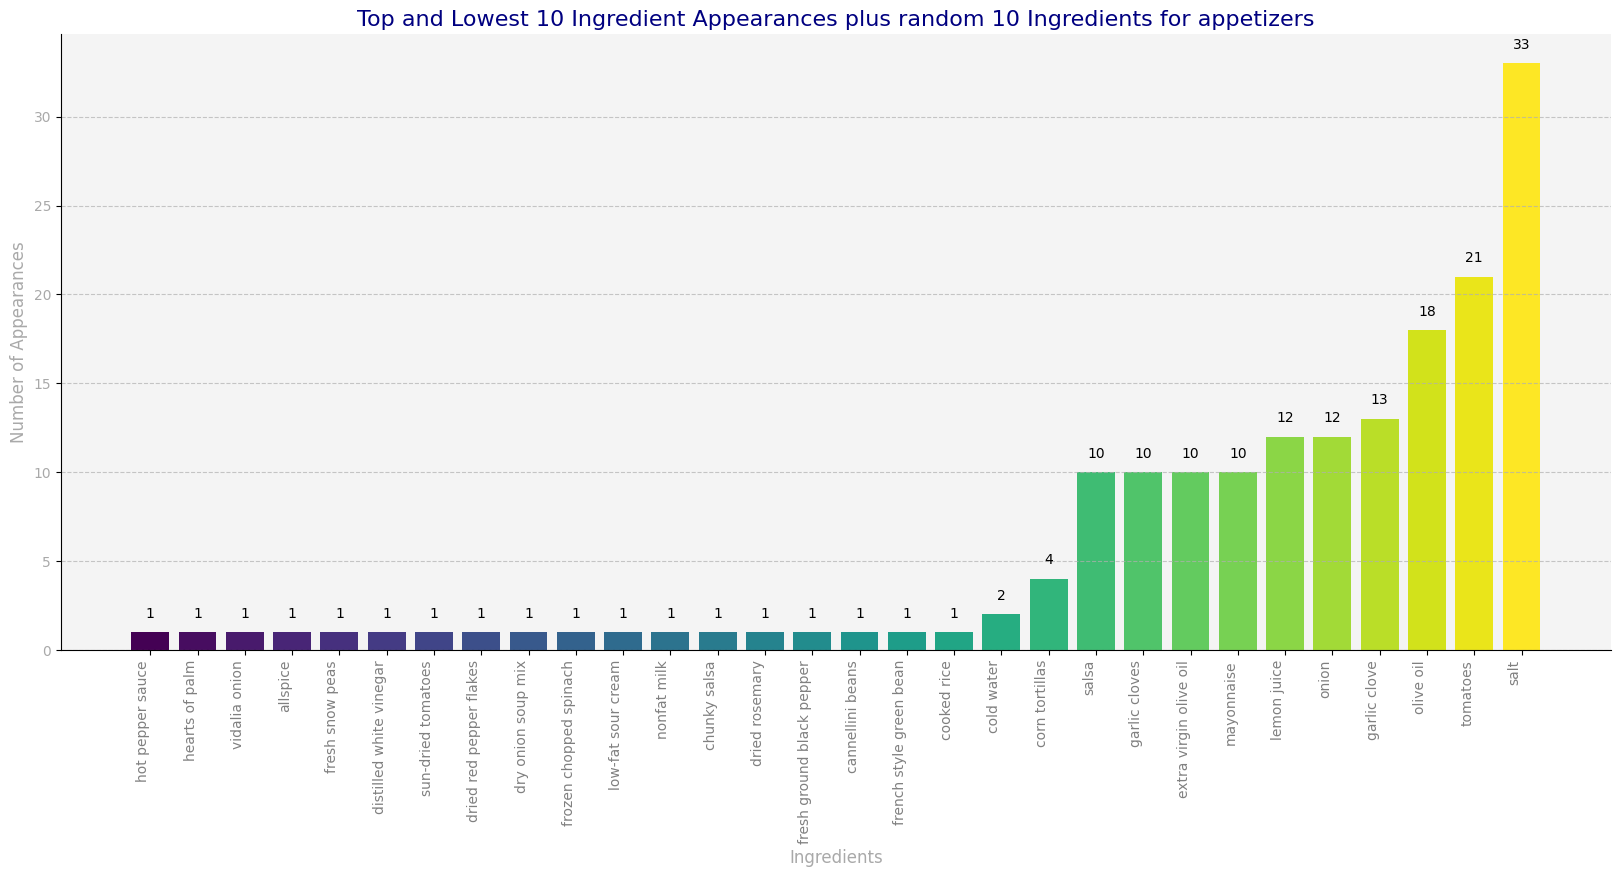

In [50]:
# Plot bar plot for the ingredients of the appetizers

# rename the column 0 to ingredient
has_ingredients_appetizers_df.rename(columns={0: 'ingredient'}, inplace=True)

# Count the occurrences of each ingredient
ingredient_counts = has_ingredients_appetizers_df['ingredient'].value_counts()

# Sort ingredients by the number of appearances
sorted_ingredients = ingredient_counts.sort_values(ascending=True)

N = 10

# get the top 10 ingredients
top_ingredients = sorted_ingredients.head(N)

# get 10 random ingredients from the middle
middle_ingredients = sorted_ingredients.sample(N)

# get the lowest 10 ingredients
lowest_ingredients = sorted_ingredients.tail(N)

# combine the top, middle and lowest ingredients
combined_ingredients = pd.concat([top_ingredients, middle_ingredients, lowest_ingredients])

combined_ingredients.sort_values(ascending=True, inplace=True)

plt.figure(figsize=(20, 8))  # Increase figure size

# Example color palette
colors = plt.cm.viridis(np.linspace(0, 1, len(combined_ingredients)))

# Get bar heights
bar_heights = combined_ingredients.values

plt.bar(combined_ingredients.index, bar_heights, color=colors, width=0.8)

# add numbers to the top of the bars
for index, value in enumerate(bar_heights):
    plt.text(index, value + 0.02 * max(bar_heights), str(value), ha='center', va='bottom', fontsize=10, color='black')

plt.xticks(rotation=90, ha='right', fontsize=10, color='grey')
plt.yticks(fontsize=10, color='darkgray')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().set_facecolor('#f4f4f4')  # Light gray background
plt.xlabel('Ingredients', fontsize=12, color='darkgray')
plt.ylabel('Number of Appearances', fontsize=12, color='darkgray')
plt.title(f'Top {N} Ingredient Appearances, Lowest {N} Ingredient Appearances and {N} random Ingredients in between for appetizers', fontsize=16, color='navy')
plt.show()


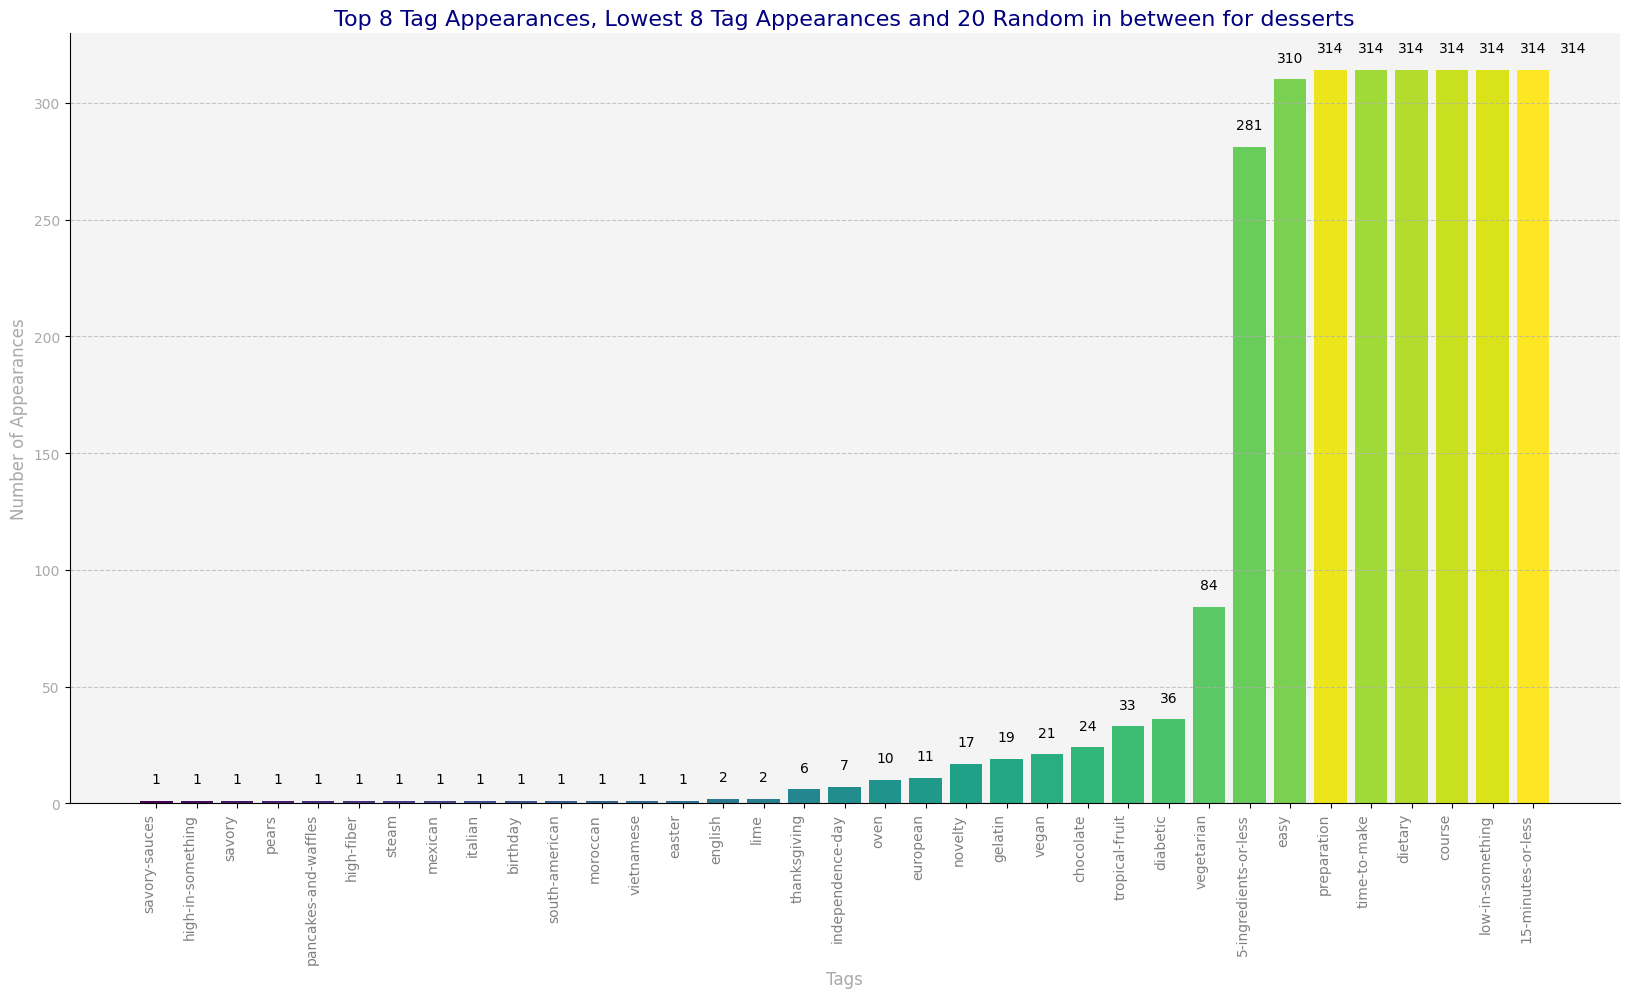

In [86]:
# Plot bar plot for the tags of the desserts

# rename the column 0 to tag
has_tags_desserts_df.rename(columns={0: 'tag'}, inplace=True)

# Remove tags 'desserts' and 'low-cholesterol'
filtered_tags = has_tags_desserts_df[has_tags_desserts_df['tag'].isin(['desserts', 'low-cholesterol']) == False]

# Count the occurrences of each tag
tag_counts = filtered_tags['tag'].value_counts()

# Sort tags by the number of appearances
sorted_tags = tag_counts.sort_values(ascending=True)

N = 8  # Set the number of top and lowest tags to display

# Top N tags
top_tags = sorted_tags.head(N)

# random 20 tags from the middle
middle_tags = sorted_tags.sample(20)

# Lowest N tags
lowest_tags = sorted_tags.tail(N)

# Combine top and lowest tags
combined_tags = pd.concat([top_tags, middle_tags, lowest_tags])

combined_tags.sort_values(ascending=True, inplace=True)

plt.figure(figsize=(20, 10))  # Increase figure size

# Example color palette
colors = plt.cm.viridis(np.linspace(0, 1, len(combined_tags)))

# Get bar heights
bar_heights = combined_tags.values

plt.bar(combined_tags.index, bar_heights, color=colors, width=0.8)

# add numbers to the top of the bars
for index, value in enumerate(bar_heights):
    plt.text(index, value + 0.02 * max(bar_heights), str(value), ha='center', va='bottom', fontsize=10, color='black')

plt.xticks(rotation=90, ha='right', fontsize=10, color='grey')
plt.yticks(fontsize=10, color='darkgray')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().set_facecolor('#f4f4f4')  # Light gray background
plt.xlabel('Tags', fontsize=12, color='darkgray')
plt.ylabel('Number of Appearances', fontsize=12, color='darkgray')
plt.title(f'Top {N} Tag Appearances, Lowest {8} Tag Appearances and 20 Random in between for desserts', fontsize=16, color='navy')
plt.show()


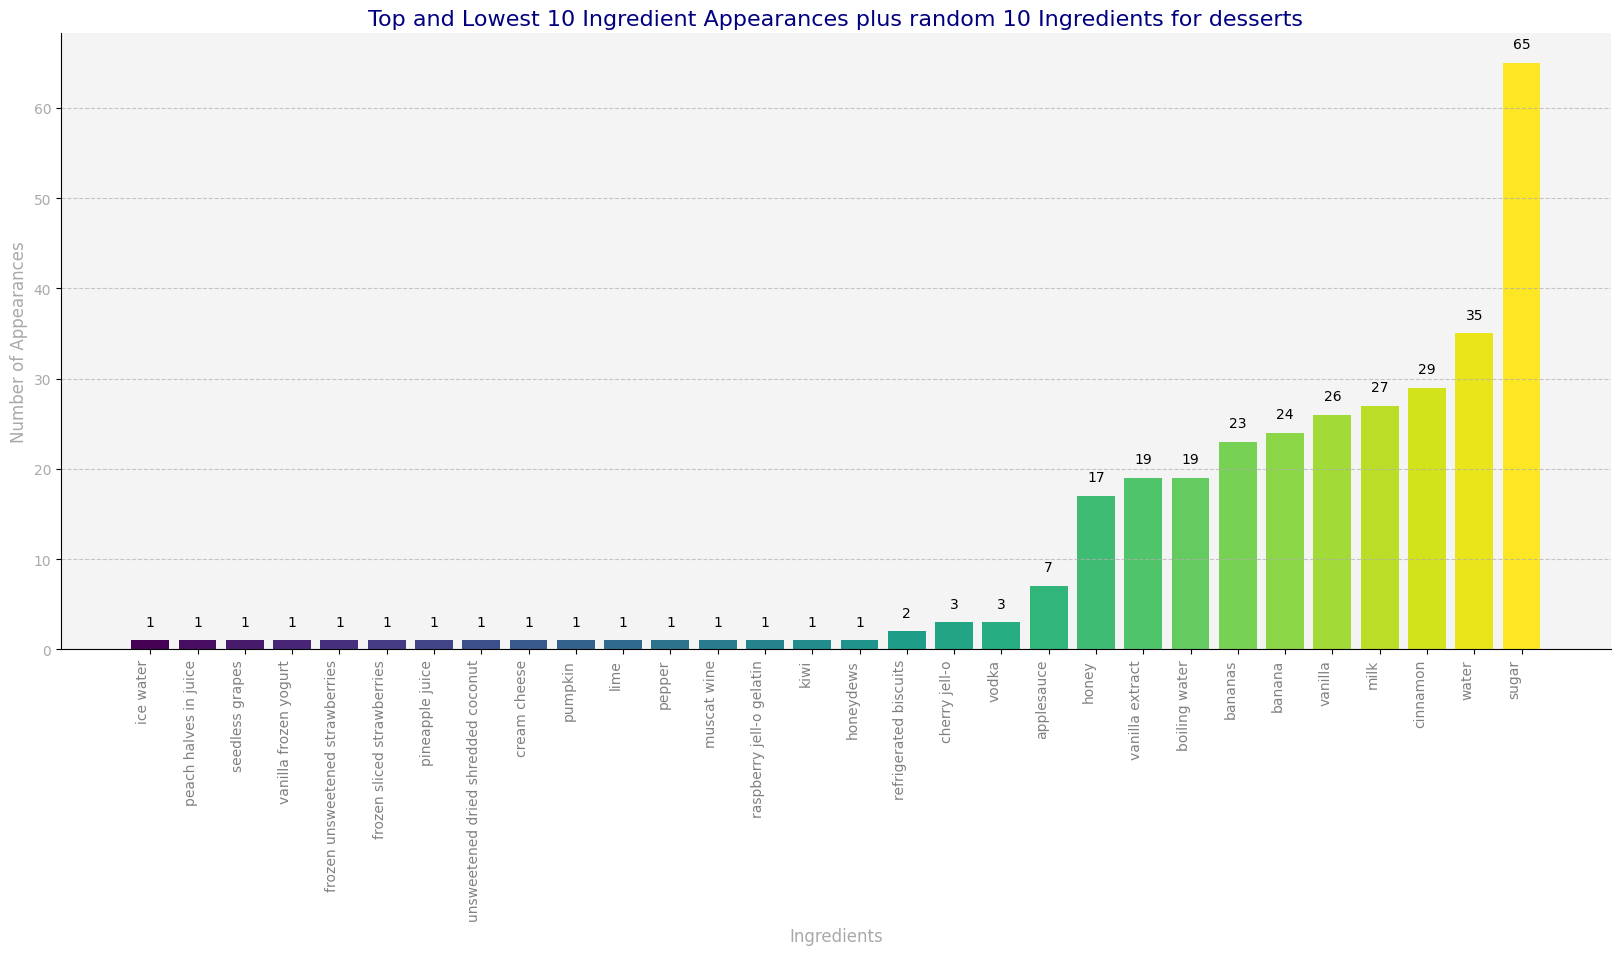

In [53]:
# Plot bar plot for the ingredients of the desserts

# rename the column 0 to ingredient
has_ingredients_desserts_df.rename(columns={0: 'ingredient'}, inplace=True)

# Count the occurrences of each ingredient
ingredient_counts = has_ingredients_desserts_df['ingredient'].value_counts()

# Sort ingredients by the number of appearances
sorted_ingredients = ingredient_counts.sort_values(ascending=True)

N = 10

# get the top 10 ingredients
top_ingredients = sorted_ingredients.head(N)

# get 10 random ingredients from the middle
middle_ingredients = sorted_ingredients.sample(N)

# get the lowest 10 ingredients
lowest_ingredients = sorted_ingredients.tail(N)

# combine the top, middle and lowest ingredients
combined_ingredients = pd.concat([top_ingredients, middle_ingredients, lowest_ingredients])

combined_ingredients.sort_values(ascending=True, inplace=True)

plt.figure(figsize=(20, 8))  # Increase figure size

# Example color palette
colors = plt.cm.viridis(np.linspace(0, 1, len(combined_ingredients)))

# Get bar heights
bar_heights = combined_ingredients.values

plt.bar(combined_ingredients.index, bar_heights, color=colors, width=0.8)

# add numbers to the top of the bars
for index, value in enumerate(bar_heights):
    plt.text(index, value + 0.02 * max(bar_heights), str(value), ha='center', va='bottom', fontsize=10, color='black')

plt.xticks(rotation=90, ha='right', fontsize=10, color='grey')
plt.yticks(fontsize=10, color='darkgray')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().set_facecolor('#f4f4f4')  # Light gray background
plt.xlabel('Ingredients', fontsize=12, color='darkgray')
plt.ylabel('Number of Appearances', fontsize=12, color='darkgray')
plt.title(f'Top {N} Ingredient Appearances, Lowest {N} Ingredient Appearances and {N} random Ingredients in between for desserts', fontsize=16, color='navy')
plt.show()
